In [2]:
import xarray as xr
import numpy as np
import warnings
import matplotlib.pyplot as plt
from scipy.signal import butter, sosfiltfilt
import matplotlib.animation as animation
from fastjmd95 import rho
import sys
warnings.filterwarnings("ignore")

ds = xr.open_dataset('~/Documents/Research/EquatorMix/EQUATORMIX/fastCTD_prof.nc',engine='netcdf4')

In [3]:
# replace all -9999 values in prof_s with NaN
ds['prof_S'] = ds['prof_S'].where(ds['prof_S'] != -9999)

In [4]:
ds = ds.assign_coords(iDEPTH=ds.prof_depth)
print(ds.iDEPTH)

<xarray.DataArray 'iDEPTH' (iDEPTH: 130)>
array([5.0000e-01, 1.5000e+00, 2.5000e+00, 3.5000e+00, 4.5000e+00, 5.5000e+00,
       6.5000e+00, 7.5000e+00, 8.5000e+00, 9.5000e+00, 1.0500e+01, 1.1500e+01,
       1.2750e+01, 1.4250e+01, 1.5750e+01, 1.7250e+01, 1.8875e+01, 2.0625e+01,
       2.2375e+01, 2.4125e+01, 2.6250e+01, 2.8750e+01, 3.1250e+01, 3.3750e+01,
       3.6250e+01, 3.8750e+01, 4.1250e+01, 4.3750e+01, 4.6250e+01, 4.8750e+01,
       5.1250e+01, 5.3750e+01, 5.6250e+01, 5.8750e+01, 6.1250e+01, 6.3750e+01,
       6.6750e+01, 7.0250e+01, 7.4000e+01, 7.8000e+01, 8.2500e+01, 8.7500e+01,
       9.2500e+01, 9.7500e+01, 1.0250e+02, 1.0750e+02, 1.1250e+02, 1.1750e+02,
       1.2250e+02, 1.2750e+02, 1.3250e+02, 1.3750e+02, 1.4250e+02, 1.4750e+02,
       1.5250e+02, 1.5750e+02, 1.6250e+02, 1.6750e+02, 1.7250e+02, 1.7750e+02,
       1.8250e+02, 1.8750e+02, 1.9250e+02, 1.9750e+02, 2.0250e+02, 2.0750e+02,
       2.1250e+02, 2.1750e+02, 2.2375e+02, 2.3125e+02, 2.3875e+02, 2.4625e+02,
       2.5

In [5]:
dsState = xr.open_dataset('TPOSE6_Hourly_Oct2012.nc',engine='netcdf4')

Text(0.5, 0, 'Profile Number')

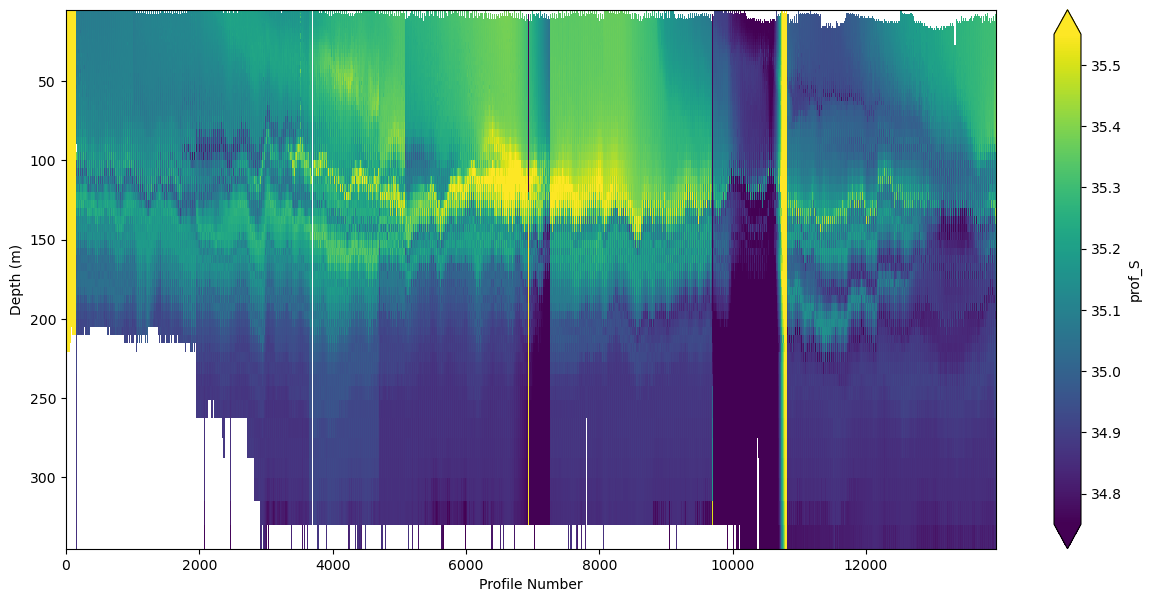

In [6]:
fig, ax = plt.subplots(figsize=(15,7))
ds.prof_S.sel(iDEPTH=slice(5,350)).T.plot(ax=ax,cmap='viridis',vmin=34.75,vmax=35.55)
ax.invert_yaxis()
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Profile Number')


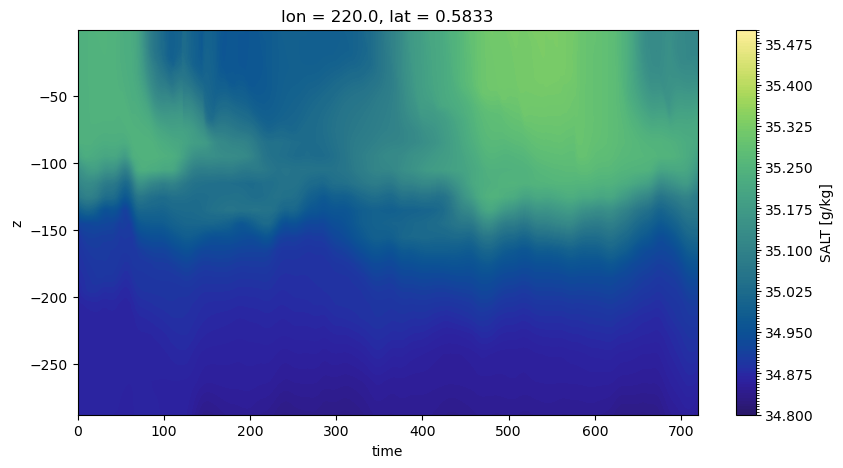

In [37]:
import cmocean as cmo
levels = np.arange(34.8,35.50,0.005)
fig, ax = plt.subplots(figsize=(10,5))
dsState.SALT.sel(lat=[0.5],lon=[220.0],method='nearest').sel(z=slice(0,-300)).squeeze().plot.contourf(ax=ax,cmap=cmo.cm.haline,levels=levels)

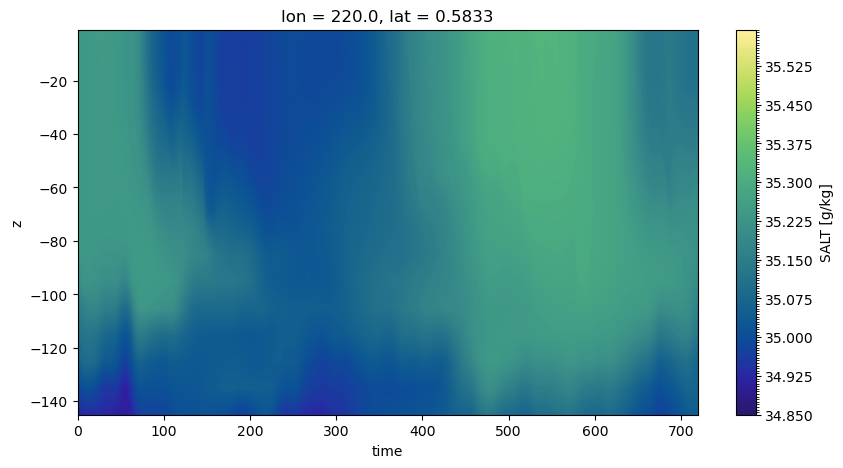

In [42]:
levels = np.arange(34.85,35.6,0.005)
fig, ax = plt.subplots(figsize=(10,5))
dsState.SALT.sel(lat=[0.5],lon=[220.0],method='nearest').sel(z=slice(0,-150)).squeeze().plot.contourf(ax=ax,cmap=cmo.cm.haline,levels=levels)

In [43]:
dsState2 = xr.open_dataset('~/TPOSE6_Daily_2012.nc',engine='netcdf4')

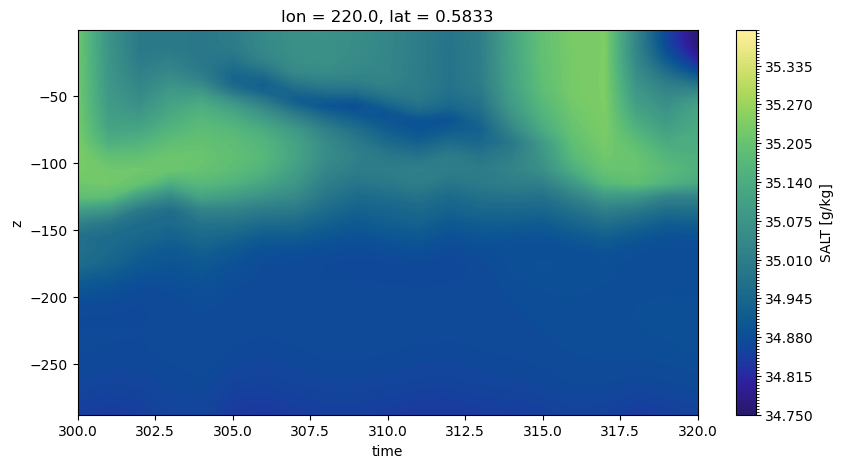

In [47]:
import cmocean as cmo
levels = np.arange(34.75,35.4,0.005)
fig, ax = plt.subplots(figsize=(10,5))
dsState2.SALT.sel(lat=[0.5],lon=[220.0],method='nearest').sel(z=slice(0,-300),time=slice(300,320)).squeeze().plot.contourf(ax=ax,cmap=cmo.cm.haline,levels=levels)